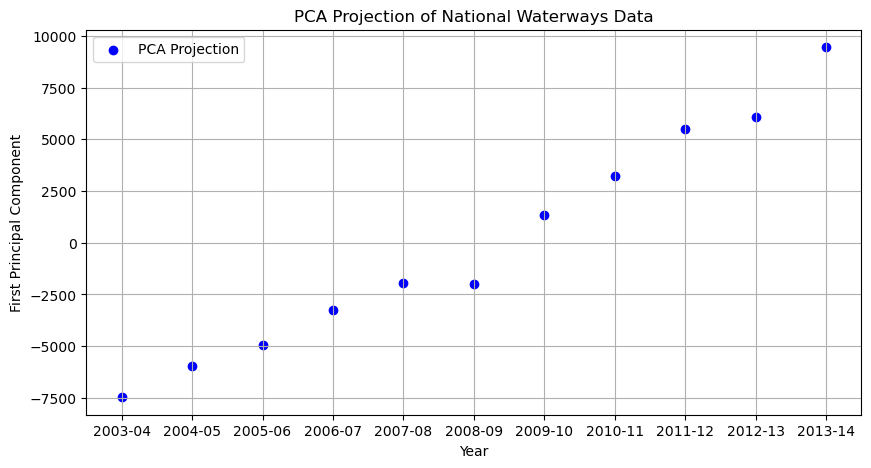

Eigenvalues: [3.02440107e+07 1.93130551e+05 9.66469315e+02]
First 5 Projected PCA Values: [-7466.06857746 -5942.41956196 -4952.81110653 -3251.12511693
 -1969.06006709]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "module2.csv"  
df = pd.read_csv(file_path)


waterways_data = df[['National Waterways- I', 'National Waterways- II', 'National Waterways-III']].values


mean_vector = np.mean(waterways_data, axis=0)
standardized_data = waterways_data - mean_vector


cov_matrix = np.cov(standardized_data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


sorted_indices = np.argsort(eigenvalues)[::-1]  
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


pca_1d = standardized_data @ eigenvectors[:, 0]


plt.figure(figsize=(10, 5))
plt.scatter(df['YEAR'], pca_1d, color='b', label="PCA Projection")
plt.xlabel("Year")
plt.ylabel("First Principal Component")
plt.title("PCA Projection of National Waterways Data")
plt.legend()
plt.grid()
plt.show()


print("Eigenvalues:", eigenvalues)
print("First 5 Projected PCA Values:", pca_1d[:5])


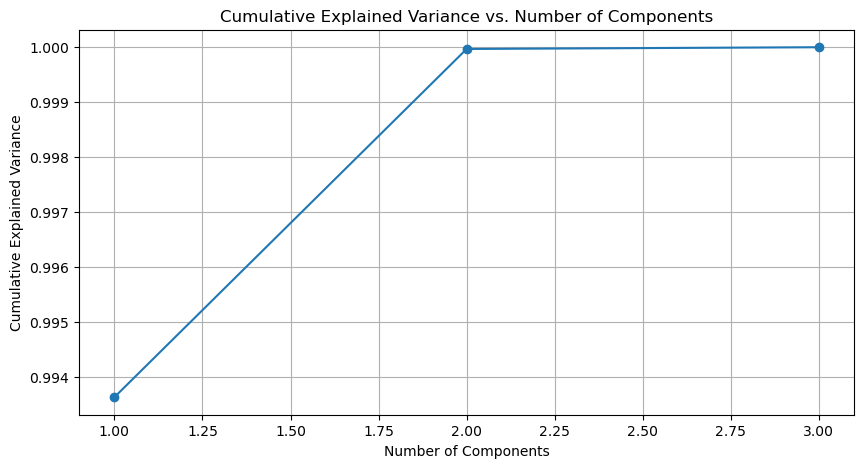

In [4]:
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()


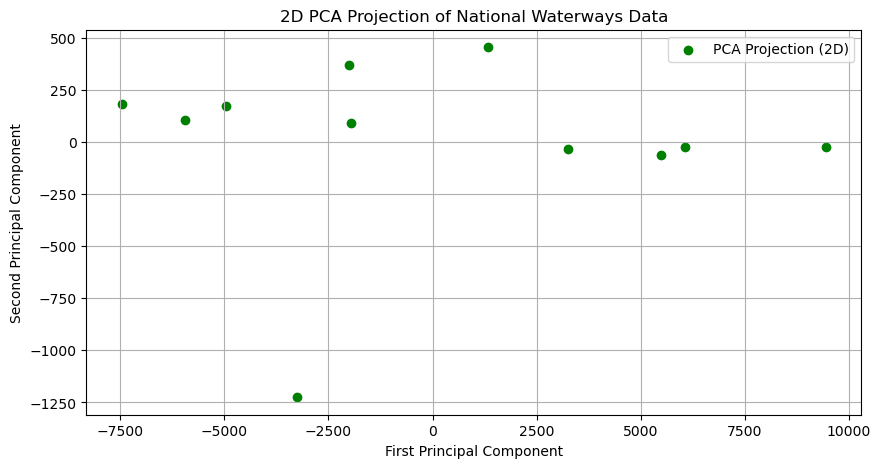

In [7]:
pca_2d = standardized_data @ eigenvectors[:, :2] 

plt.figure(figsize=(10, 5))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], color='g', label="PCA Projection (2D)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D PCA Projection of National Waterways Data")
plt.legend()
plt.grid()
plt.show()


C:\Users\Kamlekar Sravani\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


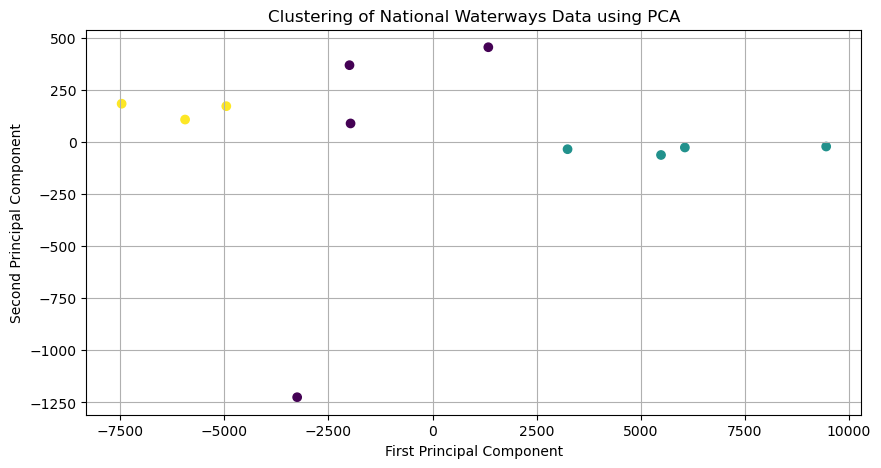

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_2d)

plt.figure(figsize=(10, 5))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters, cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Clustering of National Waterways Data using PCA")
plt.grid()
plt.show()


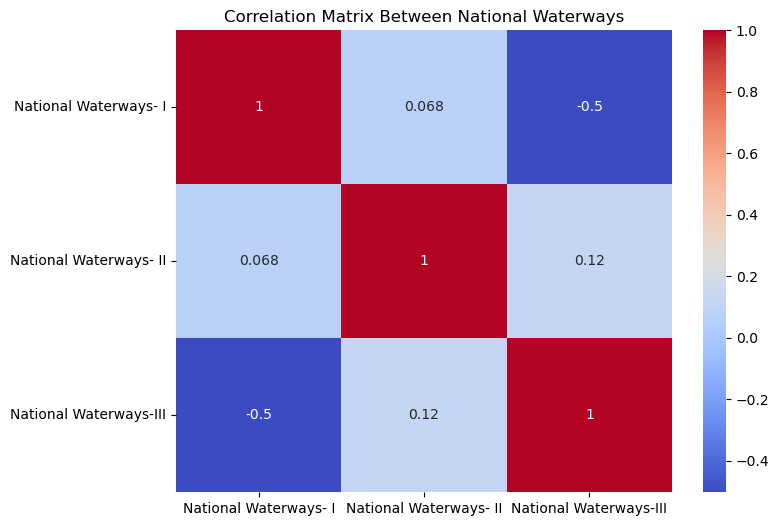

In [11]:

correlation_matrix = np.corrcoef(waterways_data, rowvar=False)


import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=df.columns[1:4], yticklabels=df.columns[1:4])
plt.title("Correlation Matrix Between National Waterways")
plt.show()


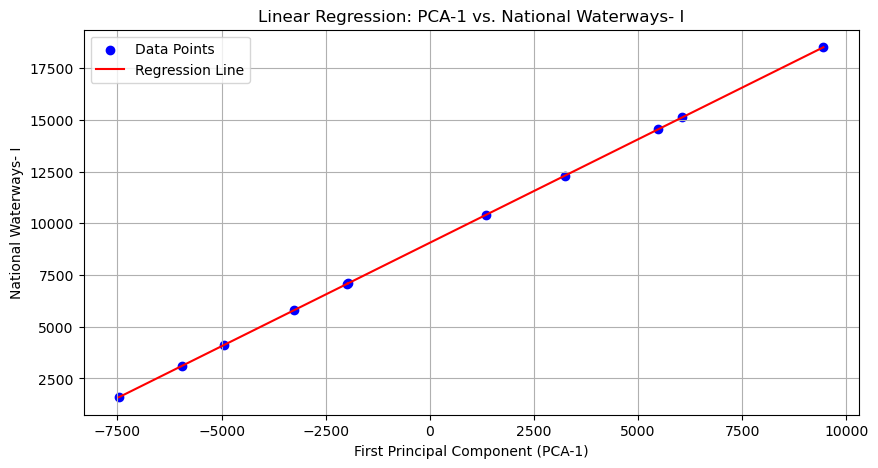

Regression Coefficient: 0.9999795905530637
Regression Intercept: 9060.727272727272


In [13]:
from sklearn.linear_model import LinearRegression


X = pca_1d.reshape(-1, 1)
y = df['National Waterways- I']


regressor = LinearRegression()
regressor.fit(X, y)


plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')
plt.xlabel("First Principal Component (PCA-1)")
plt.ylabel("National Waterways- I")
plt.title("Linear Regression: PCA-1 vs. National Waterways- I")
plt.legend()
plt.grid()
plt.show()


print(f"Regression Coefficient: {regressor.coef_[0]}")
print(f"Regression Intercept: {regressor.intercept_}")
